# Project 10 -- [Drew] [Caldwell]

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1
<p>
    <b>Deliverable</b>: Plot the total number of flights starting from the Indianapolis airport during 1987 to 2008.
</p>

In [2]:
library(data.table)

In [3]:
myindyflights <- function(myyear) {
    myDF <- fread(paste0("/anvil/projects/tdm/data/flights/subset/", myyear, ".csv"))
    myvalue <- table(myDF$Origin)['IND']
    names(myvalue) <- myyear
    return(myvalue)
}

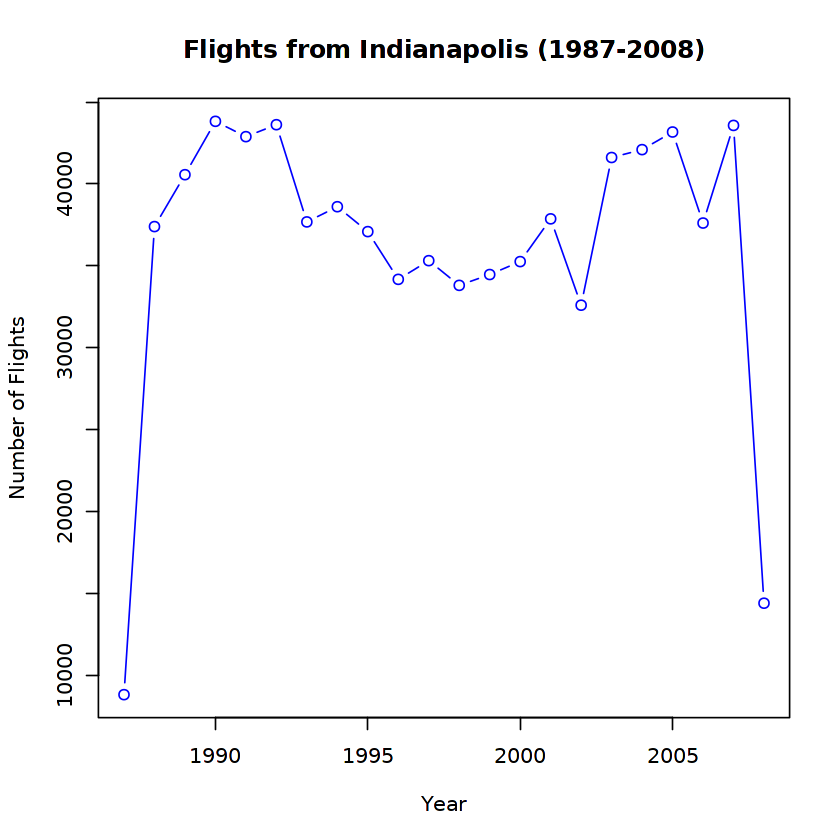

In [4]:
myresults <- sapply(1987:2008, myindyflights)
plot(names(myresults), myresults, type='b', main="Flights from Indianapolis (1987-2008)",
     xlab="Year", ylab="Number of Flights", col="blue")

Markdown notes and sentences and analysis written here.

## Question 2
<p>
    <b>Deliverable</b>: Plot the total number of flights starting from each of the top 10 airports during 1987 to 2008.

</p>

In [5]:
myflights <- function(myyear) {
    myDF <- fread(paste0("/anvil/projects/tdm/data/flights/subset/", myyear, ".csv"))
    myvalue <- table(myDF$Origin)
    return(myvalue)
}

In [6]:
myresults <- sapply(1987:2008, myflights)
v <- unlist(myresults)
total_flights <- tapply(v, names(v), sum)
top_airports <- tail(sort(total_flights), n=10)

Warning message in dotchart(top_airports, main = "Top 10 Airports by Number of Flights (1987-2008)", :
"'x' is neither a vector nor a matrix: using as.numeric(x)"


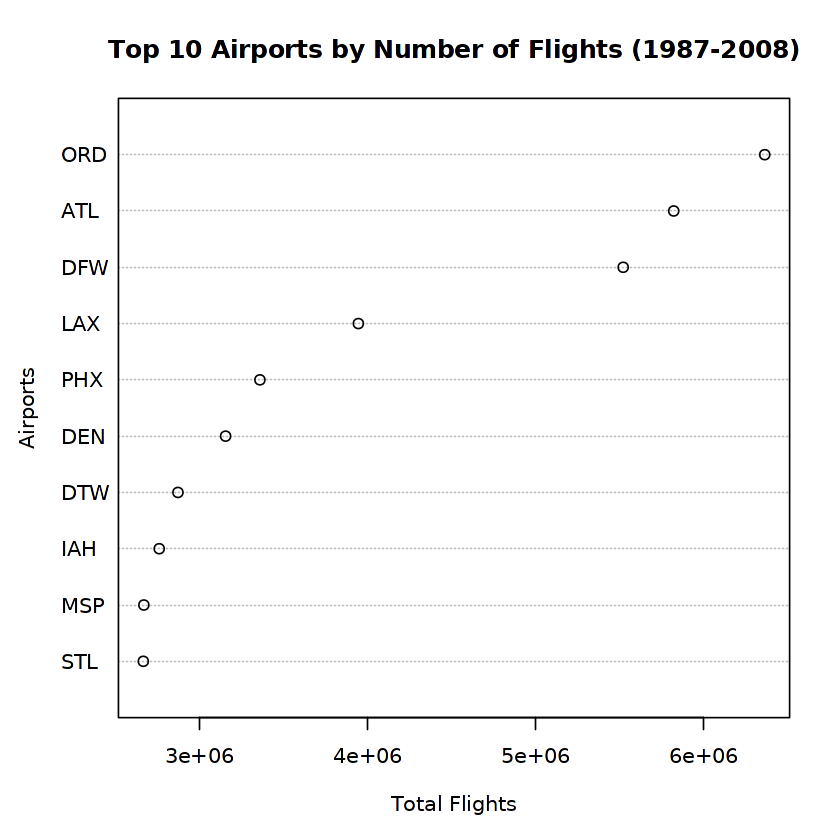

In [8]:
dotchart(top_airports, main="Top 10 Airports by Number of Flights (1987-2008)",
         xlab="Total Flights", ylab="Airports")

Markdown notes and sentences and analysis written here.

## Question 3
<p>
    <b>Deliverable</b>: Plot amount of money donated from Indiana per election cycle from 1980 to 2018.
</p>

In [9]:
myindydonations <- function(myyear) {
    myDF <- fread(paste0("/anvil/projects/tdm/data/election/itcont", myyear, ".txt"), quote="", select=c(10,15))
    names(myDF) <- c("state", "donation")
    myvalue <- tapply(myDF$donation, myDF$state, sum)['IN']
    names(myvalue) <- myyear
    return(myvalue)
}

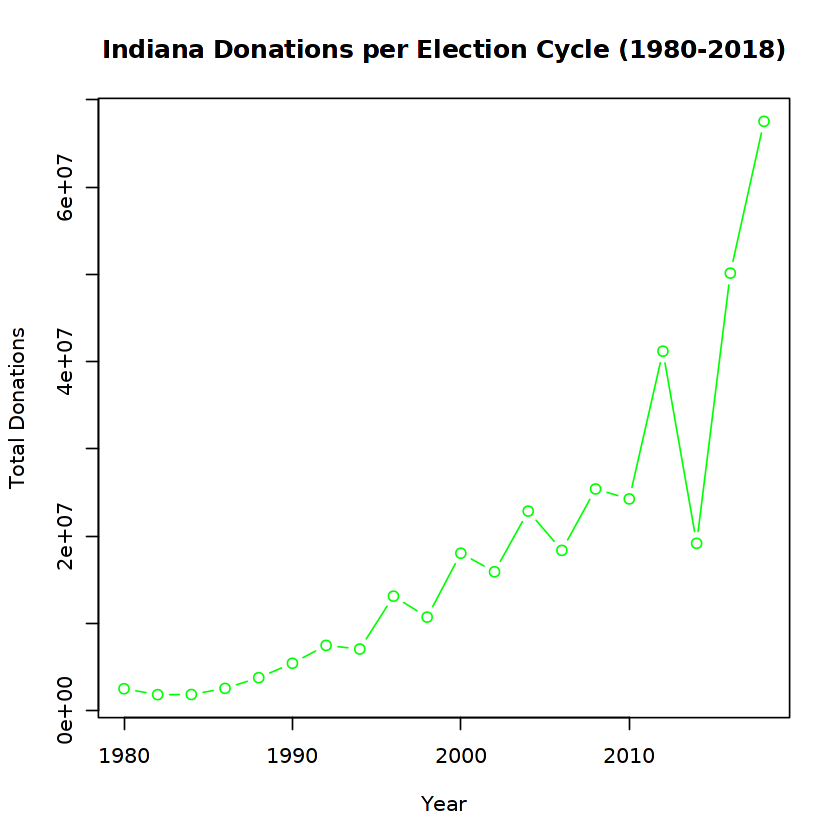

In [10]:
myresults <- sapply(seq(1980, 2018, by=2), myindydonations)
plot(names(myresults), myresults, type='b', main="Indiana Donations per Election Cycle (1980-2018)",
     xlab="Year", ylab="Total Donations", col="green")


Markdown notes and sentences and analysis written here.

## Question 4
<p>
    <b>Deliverable</b>: Plot the amount of money donated from each of the top 10 states altogether during 1980 to 2018.
</p>

In [11]:
mydonations <- function(myyear) {
    myDF <- fread(paste0("/anvil/projects/tdm/data/election/itcont", myyear, ".txt"), quote="", select=c(10,15))
    names(myDF) <- c("state", "donation")
    myvalue <- tapply(myDF$donation, myDF$state, sum)
    return(myvalue)
}

In [12]:
myresults <- sapply(seq(1980, 2018, by=2), mydonations)
v <- unlist(myresults)
total_donations <- tapply(v, names(v), sum)
top_states <- tail(sort(total_donations), n=10)

Warning message in dotchart(top_states, main = "Top 10 States by Total Donations (1980-2018)", :
"'x' is neither a vector nor a matrix: using as.numeric(x)"


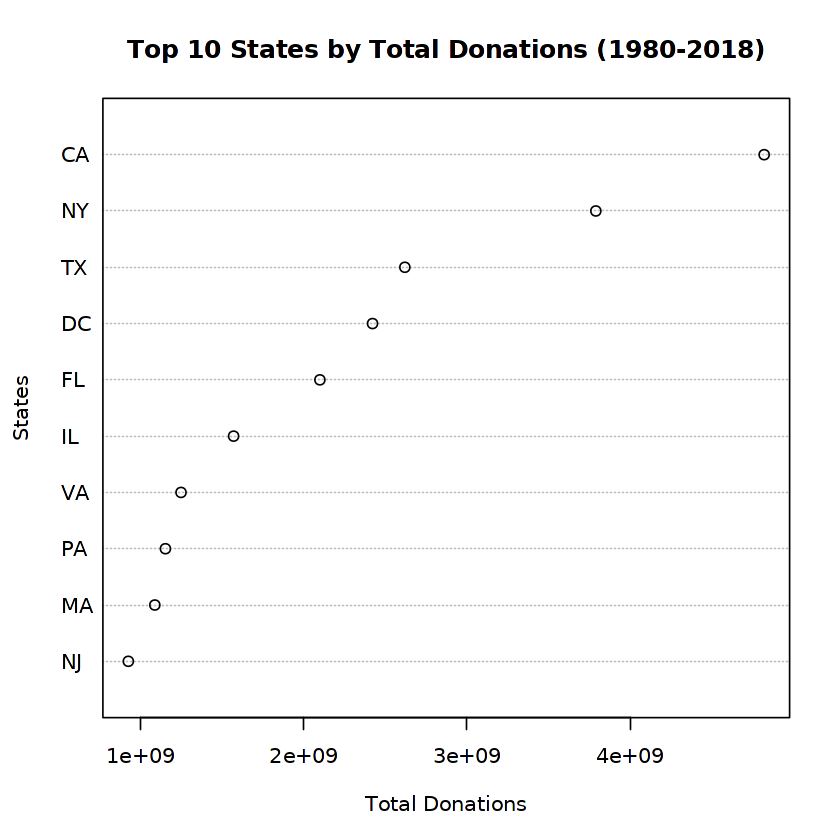

In [13]:
dotchart(top_states, main="Top 10 States by Total Donations (1980-2018)",
         xlab="Total Donations", ylab="States")

Markdown notes and sentences and analysis written here.

## Question 5
<p>
    <b>Deliverable</b>: Plot the total amount of money spent on taxi cab rides during each day in 2018.
</p>

In [15]:
library(data.table)
library(lubridate)

In [16]:
myfares <- function(mymonth) {
    myDF <- fread(paste0("/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_2018-", mymonth, ".csv"), select=c(2,17))
    mytable <- tapply(myDF$total_amount, as.Date(myDF$tpep_pickup_datetime), sum)
    return(mytable)
}

In [17]:
myresults <- sapply(sprintf("%02d", 1:12), myfares)
names(myresults) <- NULL
v <- do.call(c, myresults)
mytotals <- tapply(v, names(v), sum)
betterdates <- mytotals[year(as.Date(names(mytotals))) == 2018]

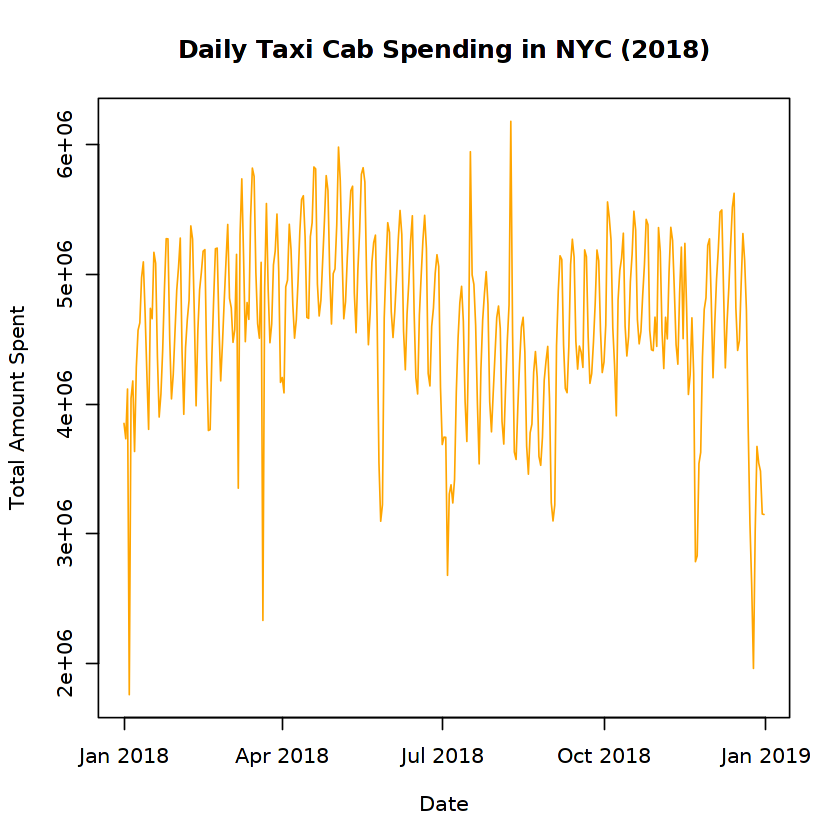

In [18]:
plot(as.Date(names(betterdates)), betterdates, type='l', main="Daily Taxi Cab Spending in NYC (2018)",
     xlab="Date", ylab="Total Amount Spent", col="orange")

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.